**<font size="5">Applied Statistics</font>**

<font size="3">MSc in High Performance Computing Engineering, Computer Science and Engineering, Physics Engineering - A.Y. 2024-2025</font>

Prof. Mario Beraha - Dott. Vittorio Torri

---

<font size="4">**Lab 3 - Hierarchical clustering**</font>

# Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree, cophenet, fcluster
from scipy.spatial.distance import pdist, squareform, cdist
from mpl_toolkits.mplot3d import Axes3D  # for 3D plots
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# Hierarchical Clustering

## Iris dataset

### Load and plot

In [3]:
from sklearn.datasets import load_iris
iris_data = load_iris()
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [4]:
iris4 = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
species_name = iris_data.target
iris = iris4.copy()
iris['target'] = species_name
iris

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
145       2  
146       2  
147       2  
148       2  
149       2  

[150 rows x 5 columns]

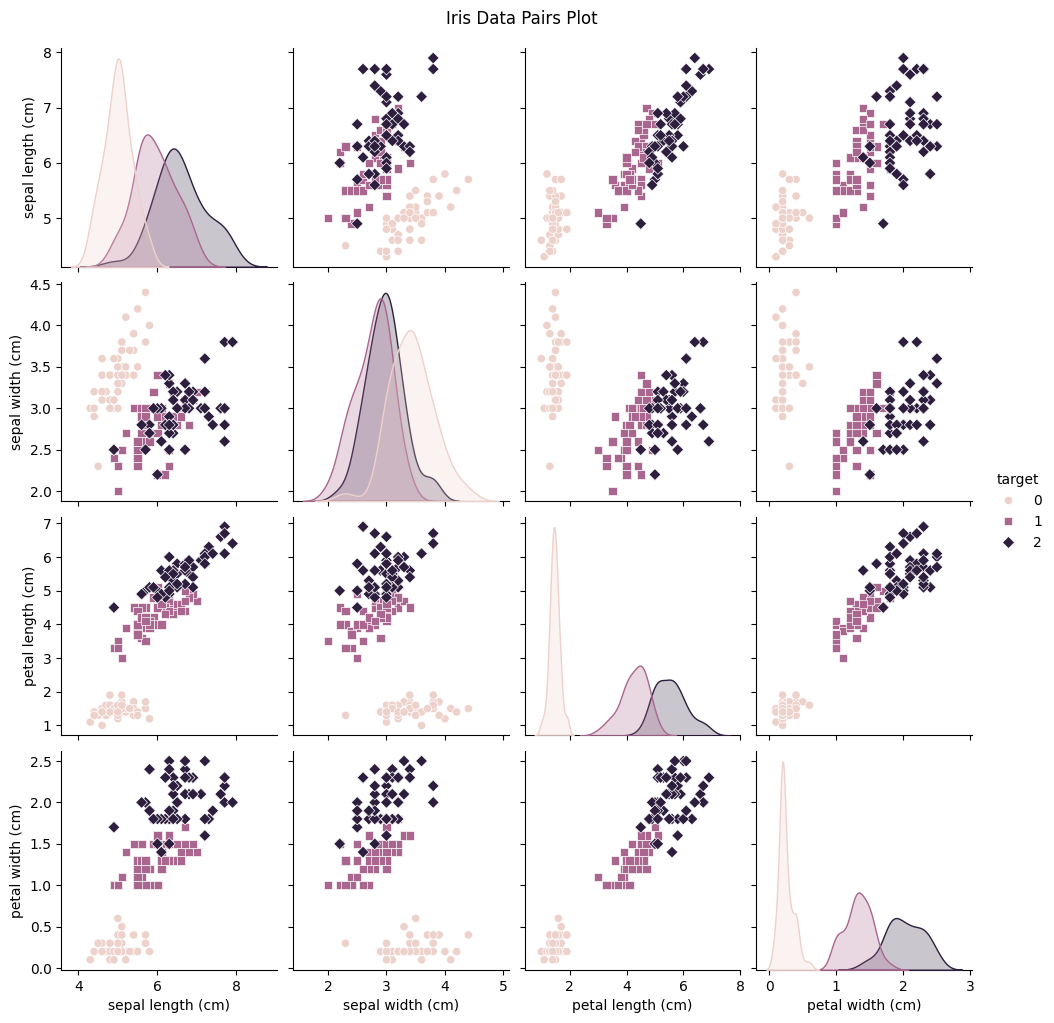

In [5]:
sns.pairplot(iris, hue="target", diag_kind="kde", markers=["o", "s", "D"])

plt.suptitle("Iris Data Pairs Plot", y=1.02)
plt.show()

### Dissimilarity matrix

Euclidean distance

$$
d_{\text{Euclidean}}(x_i, x_j) = \sqrt{\sum_{k=1}^{p} (x_{ik} - x_{jk})^2}
$$


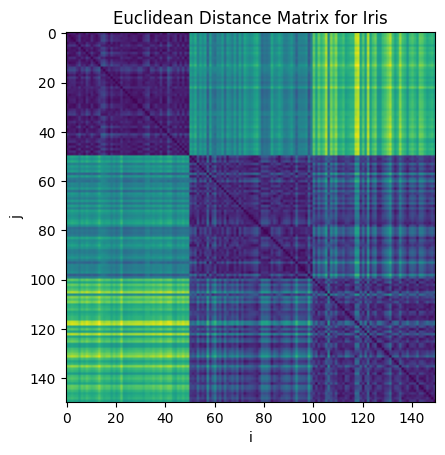

In [6]:
iris_e = pdist(iris4, metric='euclidean')
plt.imshow(squareform(iris_e), aspect='equal')
plt.title("Euclidean Distance Matrix for Iris")
plt.xlabel("i")
plt.ylabel("j")
plt.show()


Other metrics: Manhattan and Canberra

$$
d_{\text{Manhattan}}(x_i, x_j) = \sum_{k=1}^{p} |x_{ik} - x_{jk}|
$$

$$
d_{\text{Canberra}}(x_i, x_j) = \sum_{k=1}^{p} \frac{|x_{ik} - x_{jk}|}{|x_{ik}| + |x_{jk}|}
$$

Manhattan distance is less sensitive to high-dimensionality than Euclidean distance (L2 norm) and less sensitive to outliers.

The fraction in Canberra distance magnifies the impact of small differences when absolute values are small


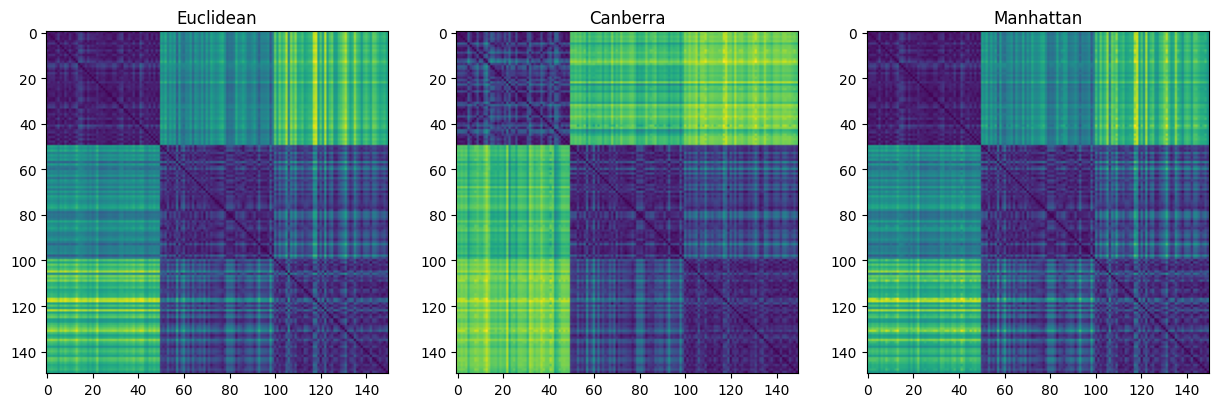

In [7]:
iris_m = pdist(iris4, metric='cityblock')
iris_c = pdist(iris4, metric='canberra')

fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].imshow(squareform(iris_e), aspect='equal')
axs[0].set_title("Euclidean")
axs[1].imshow(squareform(iris_c), aspect='equal')
axs[1].set_title("Canberra")
axs[2].imshow(squareform(iris_m), aspect='equal')
axs[2].set_title("Manhattan")
plt.show()

But the data should not be ordered according to labels. Let's shuffle them:

In [8]:
np.random.seed(42)
iris = iris.sample(frac=1)
iris4 = iris.drop('target', axis=1)

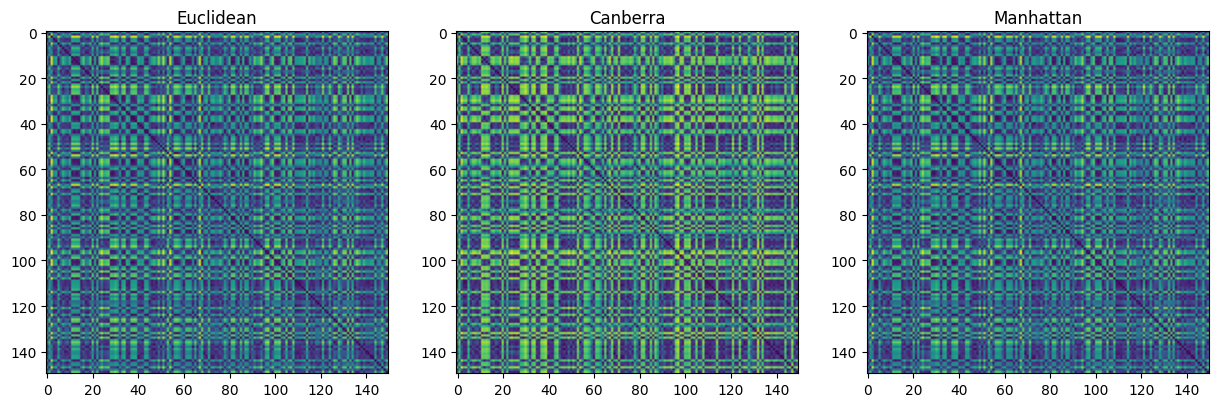

In [9]:
iris_e = pdist(iris4, metric='euclidean')
iris_m = pdist(iris4, metric='cityblock')
iris_c = pdist(iris4, metric='canberra')

fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].imshow(squareform(iris_e), aspect='equal')
axs[0].set_title("Euclidean")
axs[1].imshow(squareform(iris_c), aspect='equal')
axs[1].set_title("Canberra")
axs[2].imshow(squareform(iris_m), aspect='equal')
axs[2].set_title("Manhattan")
plt.show()

### Hierarchical clustering

Single linkage tends to form long, chain-like clusters. Works well for data where clusters are naturally spread out .

Complete linkage ensures clusters are tight and well-defined, finding more easily spherical clusters and naturally resisting outliers. Might over-fragment data when clusters have a natural spread.

Average linkage is less sensitive to outliers compared to single linkage but more flexible than complete linkage.

In [10]:
iris_es = linkage(iris_e, method='single')
iris_ea = linkage(iris_e, method='average')
iris_ec = linkage(iris_e, method='complete')

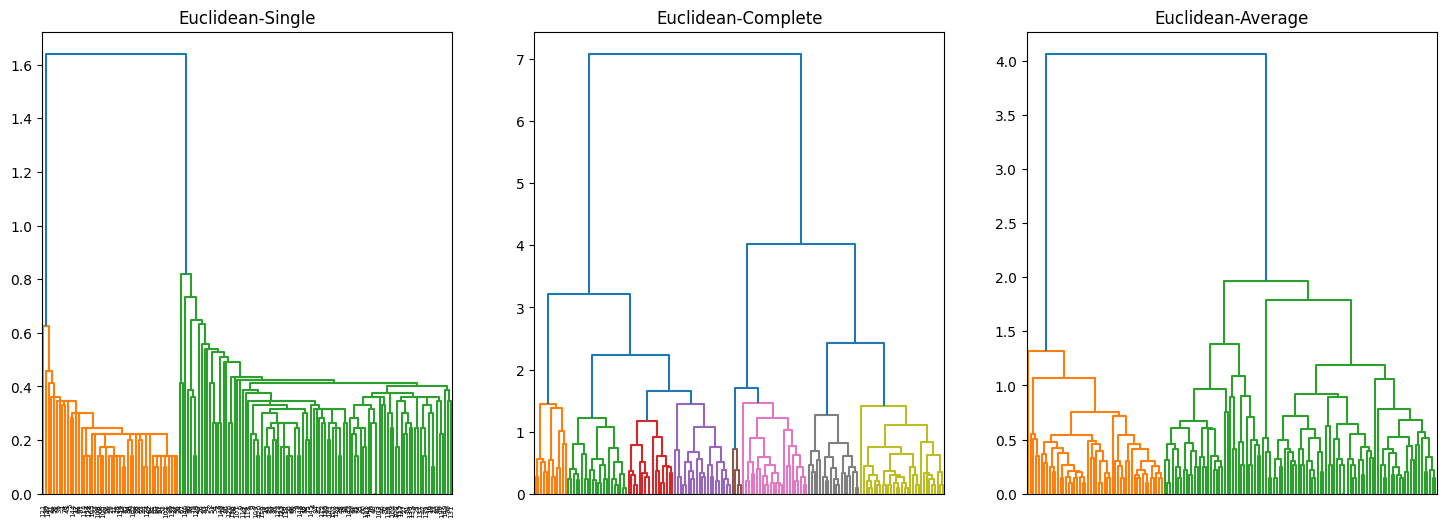

In [11]:
# Plot dendrograms:
fig, axs = plt.subplots(1, 3, figsize=(18,6))
dendrogram(iris_es, ax=axs[0], no_labels=False)
axs[0].set_title("Euclidean-Single")
dendrogram(iris_ec, ax=axs[1], no_labels=True, color_threshold=1.5)
axs[1].set_title("Euclidean-Complete")
dendrogram(iris_ea, ax=axs[2], no_labels=True)
axs[2].set_title("Euclidean-Average")
plt.show()

From the documentation of the scipy dendogram function:

   For brevity, let t  be the color_threshold. Colors all the descendent links below a cluster node the same color if is the first node below the cut threshold t.
   All links connecting nodes with distances greater than or equal to the threshold are colored with the default matplotlib color 'C0'.
   If t is less than or equal to zero, all nodes are colored 'C0'. If color_threshold is None or ‘default’, corresponding with MATLAB(TM) behavior, the threshold is set to 0.7*max(Z[:,2]).



Cut the dendrograms into 2 clusters:

In [12]:
cluster_ec = cut_tree(iris_ec, n_clusters=2).flatten()
cluster_es = cut_tree(iris_es, n_clusters=2).flatten()
cluster_ea = cut_tree(iris_ea, n_clusters=2).flatten()

In [13]:
print("Contingency table for Euclidean-Single:")
print(pd.crosstab(iris.target, cluster_es))
print("Contingency table for Euclidean-Complete:")
print(pd.crosstab(iris.target, cluster_ec))
print("Contingency table for Euclidean-Average:")
print(pd.crosstab(iris.target, cluster_ea))

Contingency table for Euclidean-Single:
col_0    0   1
target        
0        0  50
1       50   0
2       50   0
Contingency table for Euclidean-Complete:
col_0    0   1
target        
0        0  50
1       23  27
2       49   1
Contingency table for Euclidean-Average:
col_0    0   1
target        
0        0  50
1       50   0
2       50   0


In [14]:
cluster_ec = cut_tree(iris_ec, n_clusters=3).flatten()
cluster_es = cut_tree(iris_es, n_clusters=3).flatten()
cluster_ea = cut_tree(iris_ea, n_clusters=3).flatten()

print("Contingency table for Euclidean-Single:")
print(pd.crosstab(iris.target, cluster_es))
print("Contingency table for Euclidean-Complete:")
print(pd.crosstab(iris.target, cluster_ec))
print("Contingency table for Euclidean-Average:")
print(pd.crosstab(iris.target, cluster_ea))

Contingency table for Euclidean-Single:
col_0    0   1  2
target           
0        0  50  0
1       50   0  0
2       48   0  2
Contingency table for Euclidean-Complete:
col_0    0   1   2
target            
0        0  50   0
1       23   0  27
2       49   0   1
Contingency table for Euclidean-Average:
col_0    0   1   2
target            
0        0  50   0
1       50   0   0
2       14   0  36


Fix k=2 clusters

In [15]:
cluster_ec = cut_tree(iris_ec, n_clusters=2).flatten()
cluster_es = cut_tree(iris_es, n_clusters=2).flatten()
cluster_ea = cut_tree(iris_ea, n_clusters=2).flatten()

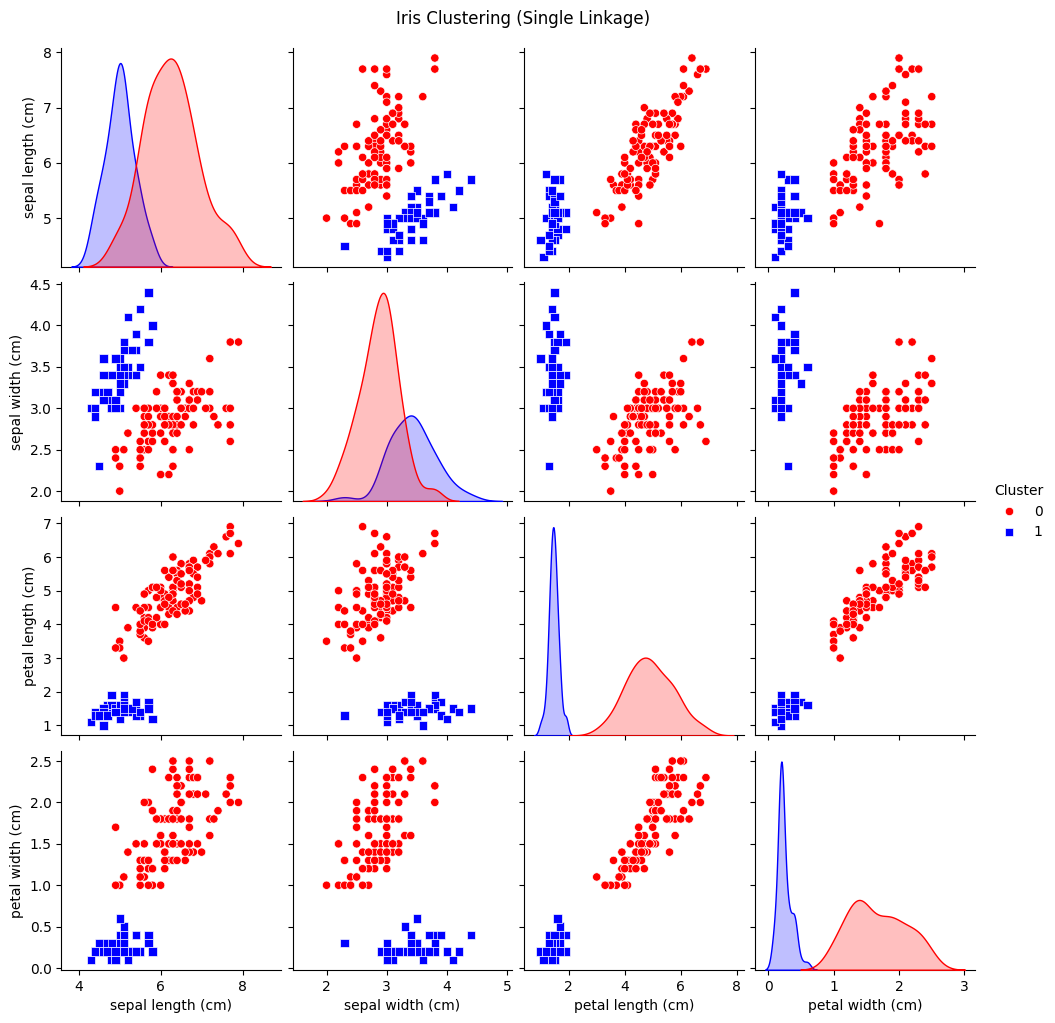

In [16]:
iris4['Cluster'] = cluster_es
palette = {0: 'red', 1: 'blue'}
sns.pairplot(iris4, hue="Cluster", diag_kind="kde", palette=palette, markers=["o", "s"])
plt.suptitle("Iris Clustering (Single Linkage)", y=1.02)
plt.show()

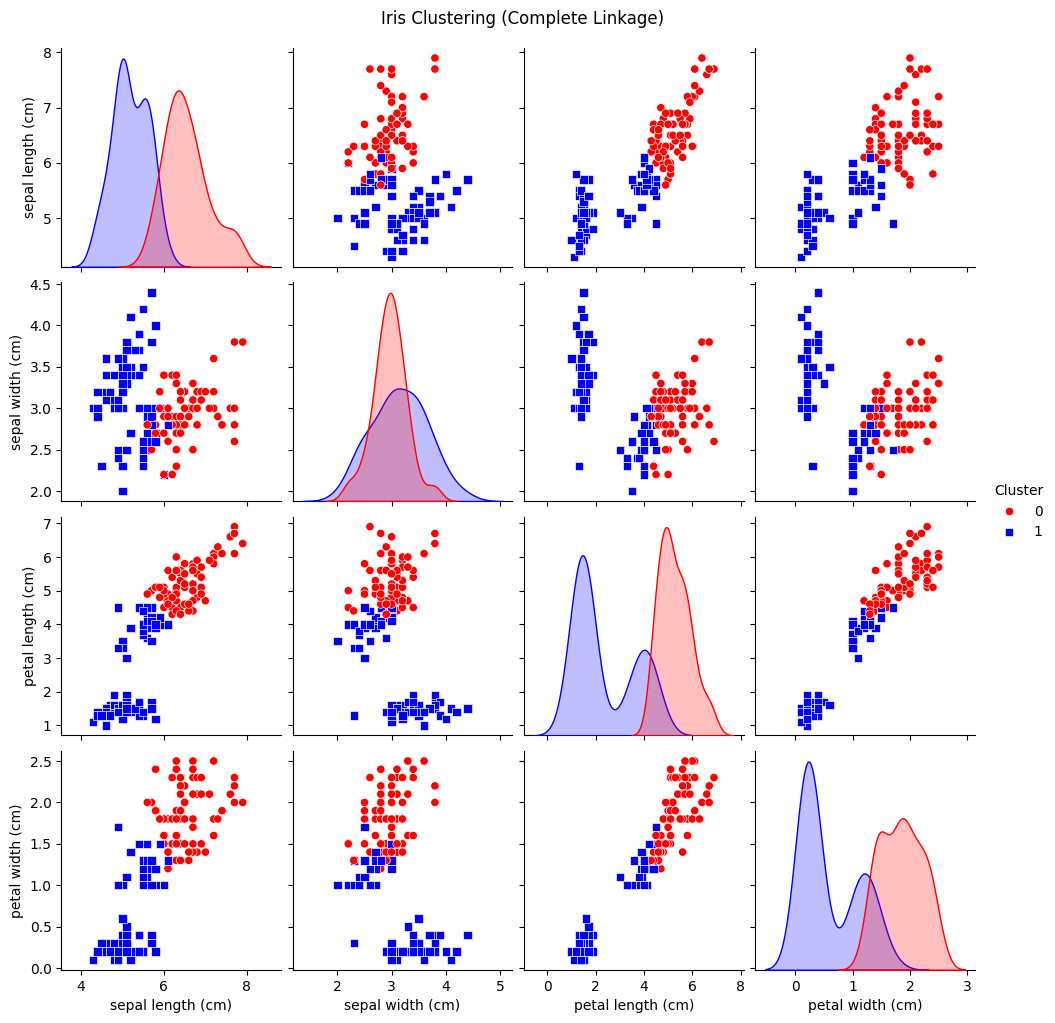

In [17]:
iris4['Cluster'] = cluster_ec
palette = {0: 'red', 1: 'blue'}
sns.pairplot(iris4, hue="Cluster", diag_kind="kde", palette=palette, markers=["o", "s"])
plt.suptitle("Iris Clustering (Complete Linkage)", y=1.02)
plt.show()

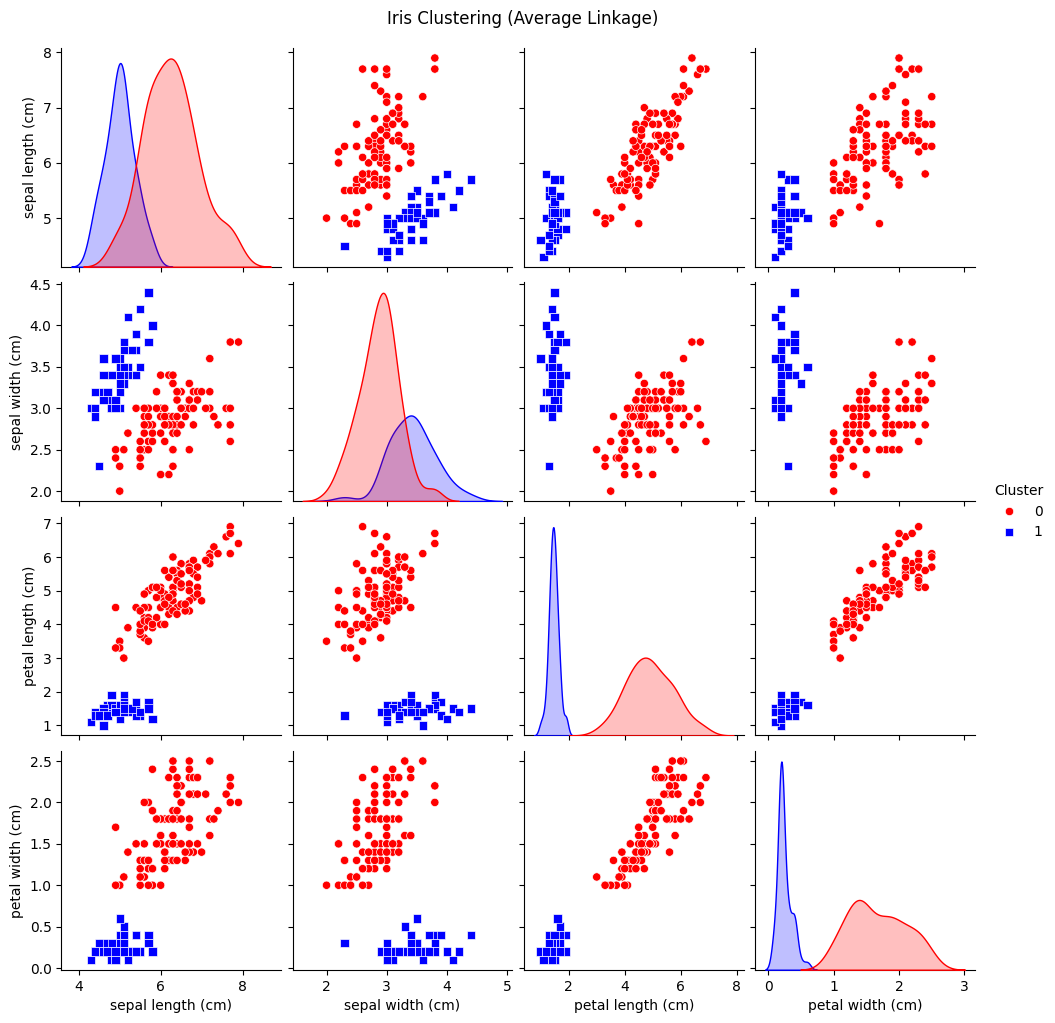

In [18]:
iris4['Cluster'] = cluster_ea
palette = {0: 'red', 1: 'blue'}
sns.pairplot(iris4, hue="Cluster", diag_kind="kde", palette=palette, markers=["o", "s"])
plt.suptitle("Iris Clustering (Average Linkage)", y=1.02)
plt.show()

### Cluster evaluation

The **cophenetic distance** between two points in a hierarchical clustering tree (dendrogram) is the height at which they are merged into the same cluster.

The **cophenetic correlation coefficient** measures how well the hierarchical clustering structure preserves the original pairwise distances, computing the correlation between $D$ and $C$

$$
CCC = \frac{\sum (d_{ij} - \bar{d})(c_{ij} - \bar{c})}{\sqrt{\sum (d_{ij} - \bar{d})^2 \sum (c_{ij} - \bar{c})^2}}
$$


with $d_{ij}$ original distances and $c_{ij}$ cophenetic distances

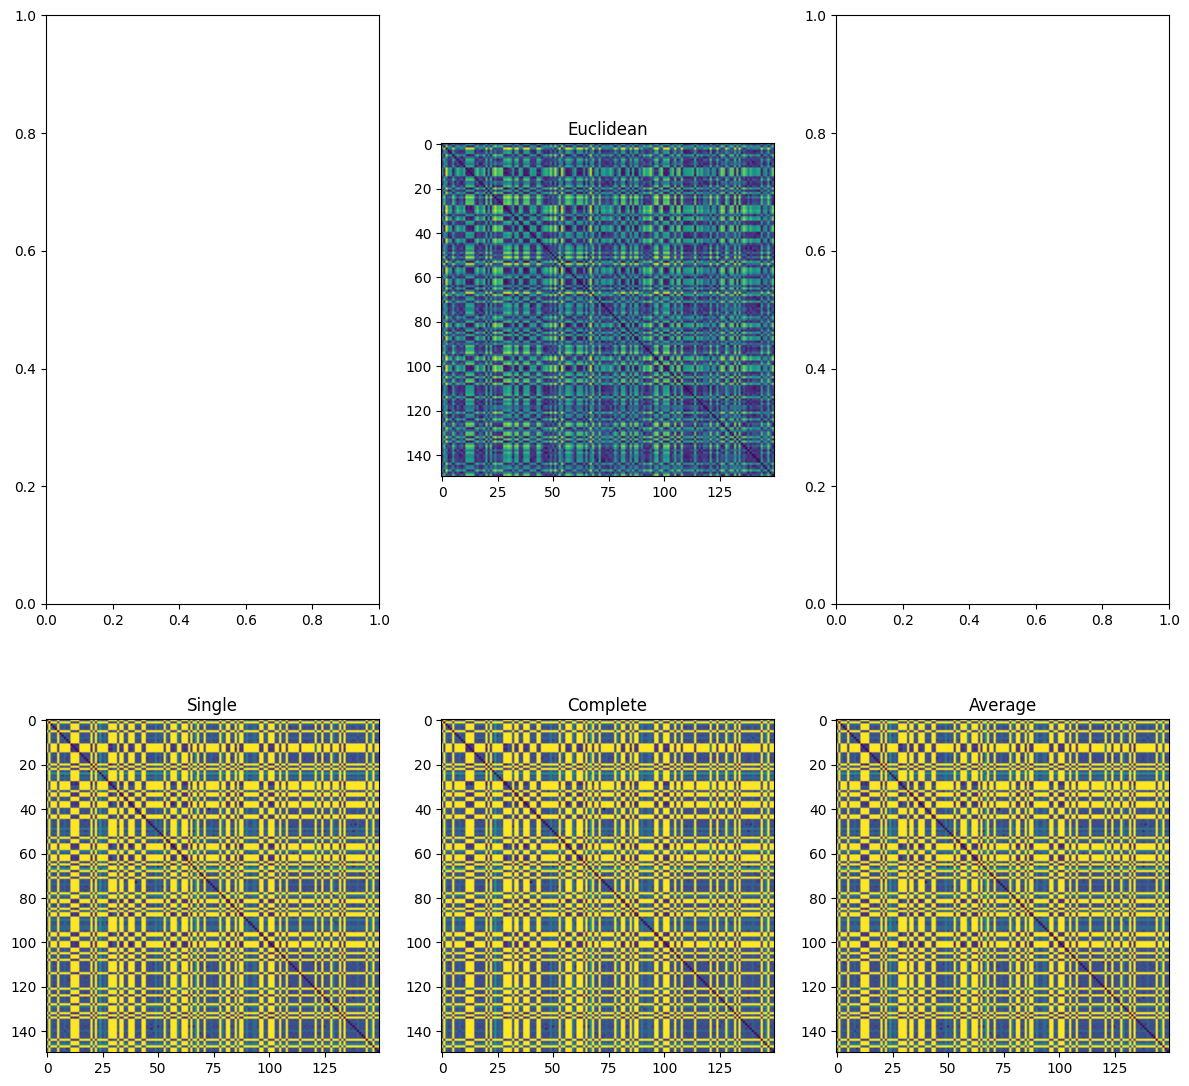

In [19]:
# Compute cophenetic distances and coefficients
coph_es, coph_dists_es = cophenet(iris_es, iris_e)
coph_ec, coph_dists_ec = cophenet(iris_ec, iris_e)
coph_ea, coph_dists_ea = cophenet(iris_ea, iris_e)

fig, axs = plt.subplots(2, 3, figsize=(12,12))
axs[0,1].imshow(squareform(iris_e), aspect='equal')
axs[0,1].set_title("Euclidean")
axs[1,0].imshow(squareform(coph_dists_es), aspect='equal')
axs[1,0].set_title("Single")
axs[1,1].imshow(squareform(coph_dists_es), aspect='equal')
axs[1,1].set_title("Complete")
axs[1,2].imshow(squareform(coph_dists_es), aspect='equal')
axs[1,2].set_title("Average")
plt.tight_layout()
plt.show()

In [20]:
print("Cophenetic coefficients:")
print({"Eucl-Single": coph_es, "Eucl-Complete": coph_ec, "Eucl-Average": coph_ea})

Cophenetic coefficients:
{'Eucl-Single': np.float64(0.8638786773076584), 'Eucl-Complete': np.float64(0.7276283289028814), 'Eucl-Average': np.float64(0.8769561464741984)}


Internal metrics valid for any clustering algorithm:

$$
WSS = \sum_{k=1}^{K} \sum_{x_i \in C_k} \| x_i - \mu_k \|^2
$$

$$
BSS = \sum_{k=1}^{K} |C_k| \cdot \| \mu_k - \mu \|^2
$$

WSS should be minimized, while BSS should be maximized

In [21]:
def compute_internal_measures(x, merges, k_values):
    wss_values = {}
    bss_values = {}

    overall_mean = np.mean(x, axis=0)  # Compute global mean

    for k in k_values:
        clustering = fcluster(merges, k, criterion='maxclust')
        # computes centroids for all clusters
        centroids = [np.mean(x[clustering==c],axis=0) for c in range(1,k+1)]
        cluster_sizes = [len(x[clustering==c]) for c in range(1,k+1)]
        # computes the euclidean distance between each point and each centroid
        D = cdist(x, centroids, 'euclidean')
        # find nearest centroid for each point
        cIdx = np.argmin(D,axis=1)
        # store the distances to the nearest centroid
        d = np.min(D,axis=1)

        # WSS
        wss = sum(d**2)

        # BSS
        bss = np.sum([size * np.sum((centroid - overall_mean) ** 2) for size, centroid in zip(cluster_sizes, centroids)])

        wss_values[k] = wss
        bss_values[k] = bss
    return wss_values,bss_values

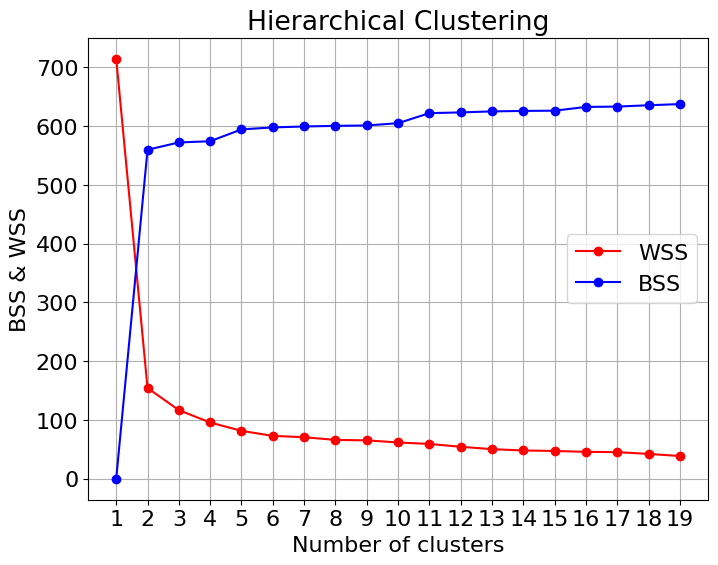

In [22]:
k_values = range(1,20)
wss_dict, bss_dict = compute_internal_measures(iris4, iris_es, k_values)
wss_values = [wss_dict[x] for x in range(1,20)]
bss_values = [bss_dict[x] for x in range(1,20)]
fig = plt.figure(figsize=(8,6))
font = {'family' : 'sans', 'size'   : 16}
plt.rc('font', **font)
plt.plot(k_values, wss_values, 'bo-', color='red', label='WSS')
plt.plot(k_values, bss_values, 'bo-', color='blue', label='BSS')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('BSS & WSS')
plt.xticks(k_values)
plt.legend()
plt.title('Hierarchical Clustering');

### Cluster description

In [23]:
iris4['Cluster'] = cluster_ea
iris4.groupby('Cluster').describe()

sepal length (cm)                                            \
                    count   mean       std  min  25%  50%  75%  max   
Cluster                                                               
0                   100.0  6.262  0.662834  4.9  5.8  6.3  6.7  7.9   
1                    50.0  5.006  0.352490  4.3  4.8  5.0  5.2  5.8   

        sepal width (cm)         ... petal length (cm)      petal width (cm)  \
                   count   mean  ...               75%  max            count   
Cluster                          ...                                           
0                  100.0  2.872  ...             5.525  6.9            100.0   
1                   50.0  3.428  ...             1.575  1.9             50.0   

                                                   
          mean       std  min  25%  50%  75%  max  
Cluster                                            
0        1.676  0.424769  1.0  1.3  1.6  2.0  2.5  
1        0.246  0.105386  0.1  0.2  0.2  0.3  0.6  

[2 rows x 32 columns]

**Snake plots**

First, the data are normalized (according to the mean and the standard deviation) then we plot each cluster's average normalized values of each attribute.

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

normalized_iris = scaler.fit_transform(iris4)
df_iris_normalized = pd.DataFrame(normalized_iris,columns=iris4.columns)
df_iris_normalized['Cluster'] = cluster_ea

In [26]:
df_iris_melt = pd.melt(df_iris_normalized,
                    id_vars=['Cluster'],
                    value_vars=iris4.columns,
                    var_name='Attribute',
                    value_name='Value')
df_iris_melt

Cluster          Attribute     Value
0          0  sepal length (cm)  0.310998
1          1  sepal length (cm) -0.173674
2          0  sepal length (cm)  2.249683
3          0  sepal length (cm)  0.189830
4          0  sepal length (cm)  1.159173
..       ...                ...       ...
595        0   petal width (cm)  0.132510
596        0   petal width (cm)  0.659038
597        1   petal width (cm) -1.315444
598        0   petal width (cm)  0.000878
599        0   petal width (cm)  1.185567

[600 rows x 3 columns]

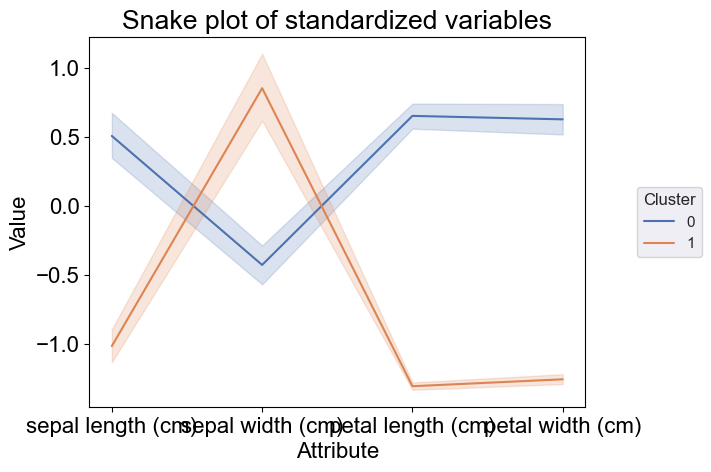

In [27]:
plt.title('Snake plot of standardized variables')
sns.set(rc={'figure.figsize':(20,8)})
sns.lineplot(x="Attribute", y="Value", hue='Cluster', data=df_iris_melt)
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1, title='Cluster');

## Simulated data

### Univariate

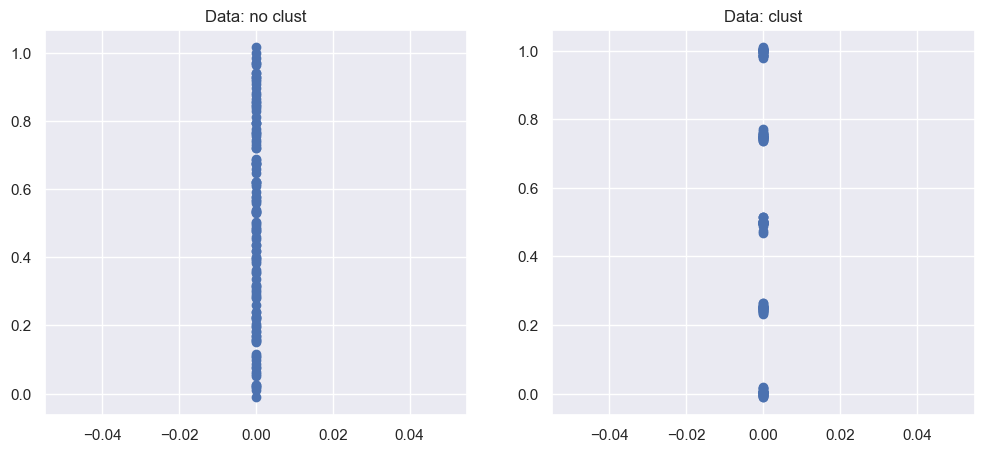

In [28]:
np.random.seed(123)
# x : vector of NON clustered data
x = np.linspace(0, 1, 125) + np.random.normal(scale=0.01, size=125)
# y: 5 clusters of 25 points each
y = np.concatenate([np.random.normal(loc=mean, scale=0.01, size=25) for mean in [0, 0.25, 0.5, 0.75, 1]])
x = np.random.permutation(x)
y = np.random.permutation(y)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(np.zeros(125), x, 'o')
plt.title("Data: no clust")
plt.subplot(1,2,2)
plt.plot(np.zeros(125), y, 'o')
plt.title("Data: clust")
plt.show()

In [29]:
dx = pdist(x.reshape(-1,1), metric='euclidean')
dy = pdist(y.reshape(-1,1), metric='euclidean')
hcx = linkage(dx, method='single')
hcy = linkage(dy, method='single')
dx

array([0.6681858 , 0.40570206, 0.28933963, ..., 0.10706038, 0.64422969,
       0.75129007], shape=(7750,))

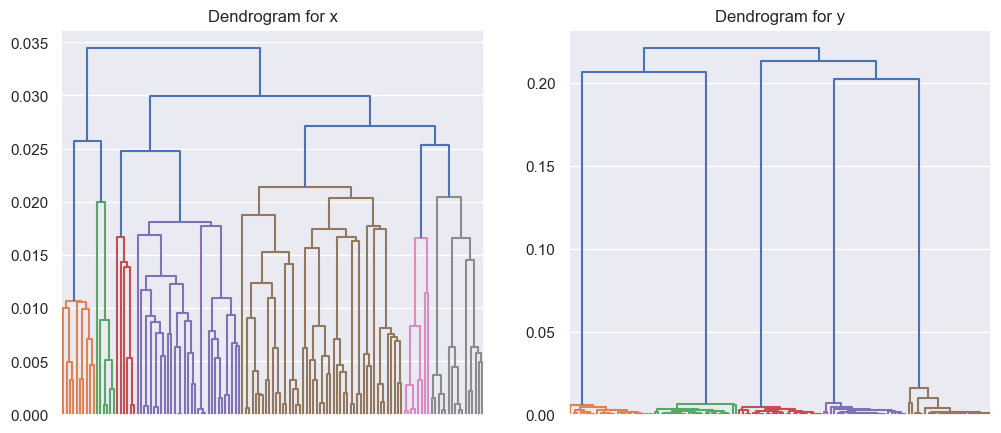

In [30]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
dendrogram(hcx, no_labels=True)
plt.title("Dendrogram for x")
plt.subplot(1,2,2)
dendrogram(hcy, no_labels=True)
plt.title("Dendrogram for y")
plt.show()

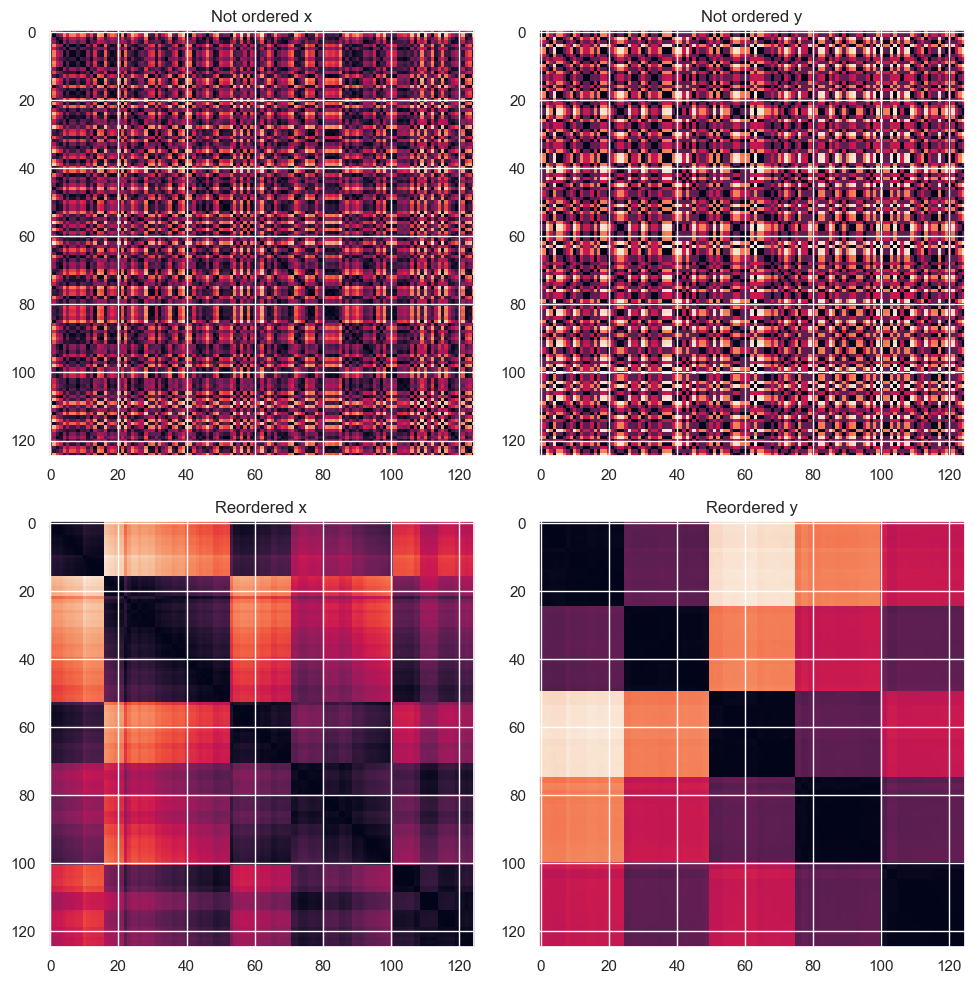

In [31]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(squareform(dx), aspect='equal')
plt.title("Not ordered x")
plt.subplot(2,2,2)
plt.imshow(squareform(dy), aspect='equal')
plt.title("Not ordered y")

order_x = dendrogram(hcx, no_plot=True)['leaves']
order_y = dendrogram(hcy, no_plot=True)['leaves']
plt.subplot(2,2,3)
plt.imshow(squareform(dx)[np.ix_(order_x, order_x)], aspect='equal')
plt.title("Reordered x")
plt.subplot(2,2,4)
plt.imshow(squareform(dy)[np.ix_(order_y, order_y)], aspect='equal')
plt.title("Reordered y")
plt.tight_layout()
plt.show()

### Bivariate 1

Chaining effect with single linkage

In [33]:
p = 2
n = 100
mu1 = [0, 1]
mu2 = [5, 1.2]
sig = np.eye(p)
np.random.seed(1)
X1 = np.random.multivariate_normal(mu1, sig, n)
X2 = np.random.multivariate_normal(mu2, sig, n)
X = np.vstack([X1, X2])

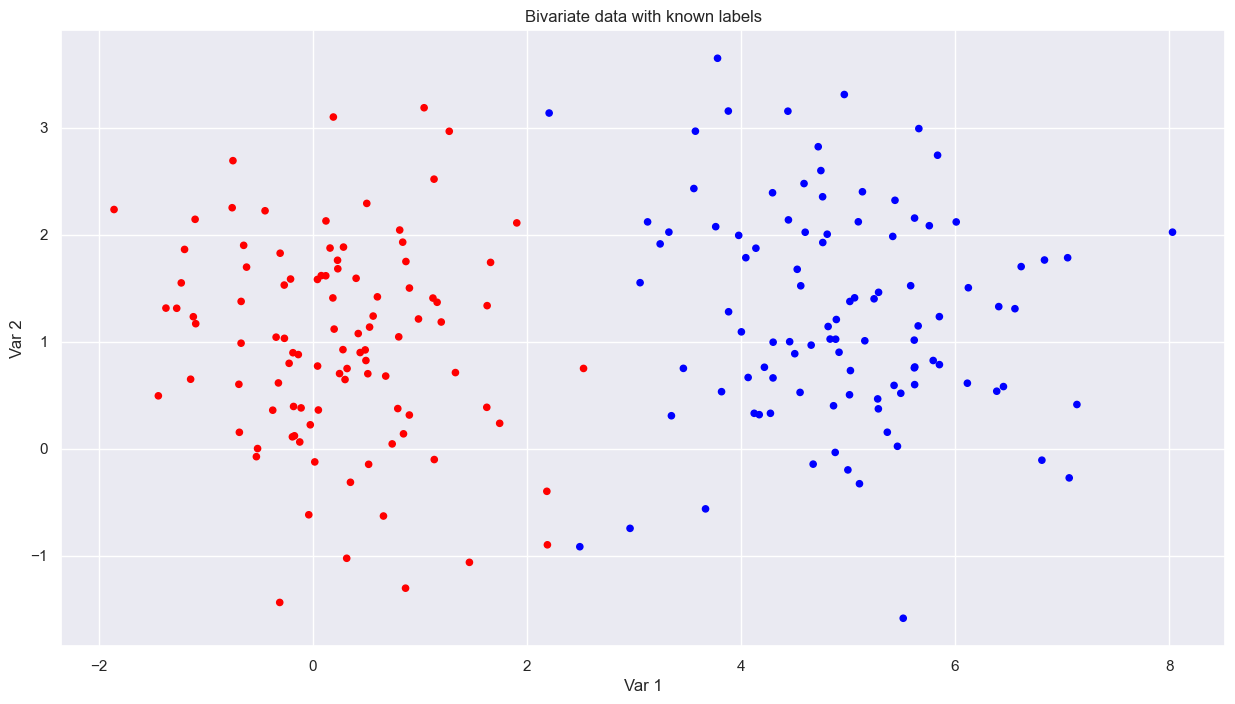

In [34]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=np.repeat(['red','blue'], n), s=20)
plt.xlabel("Var 1")
plt.ylabel("Var 2")
plt.title("Bivariate data with known labels")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree, cophenet, fcluster

clusters = {}
linkages = ['single', 'average', 'complete']
dissimilarity_matrix = pdist(X, metric='euclidean')
cs=[]

for lin in linkages:
  c = linkage(dissimilarity_matrix, method=lin)
  cs.append(c)
  cluster = cut_tree(c, n_clusters=2).flatten()
  clusters[lin] = cluster


clusters

{'single': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]),
 'average': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
 

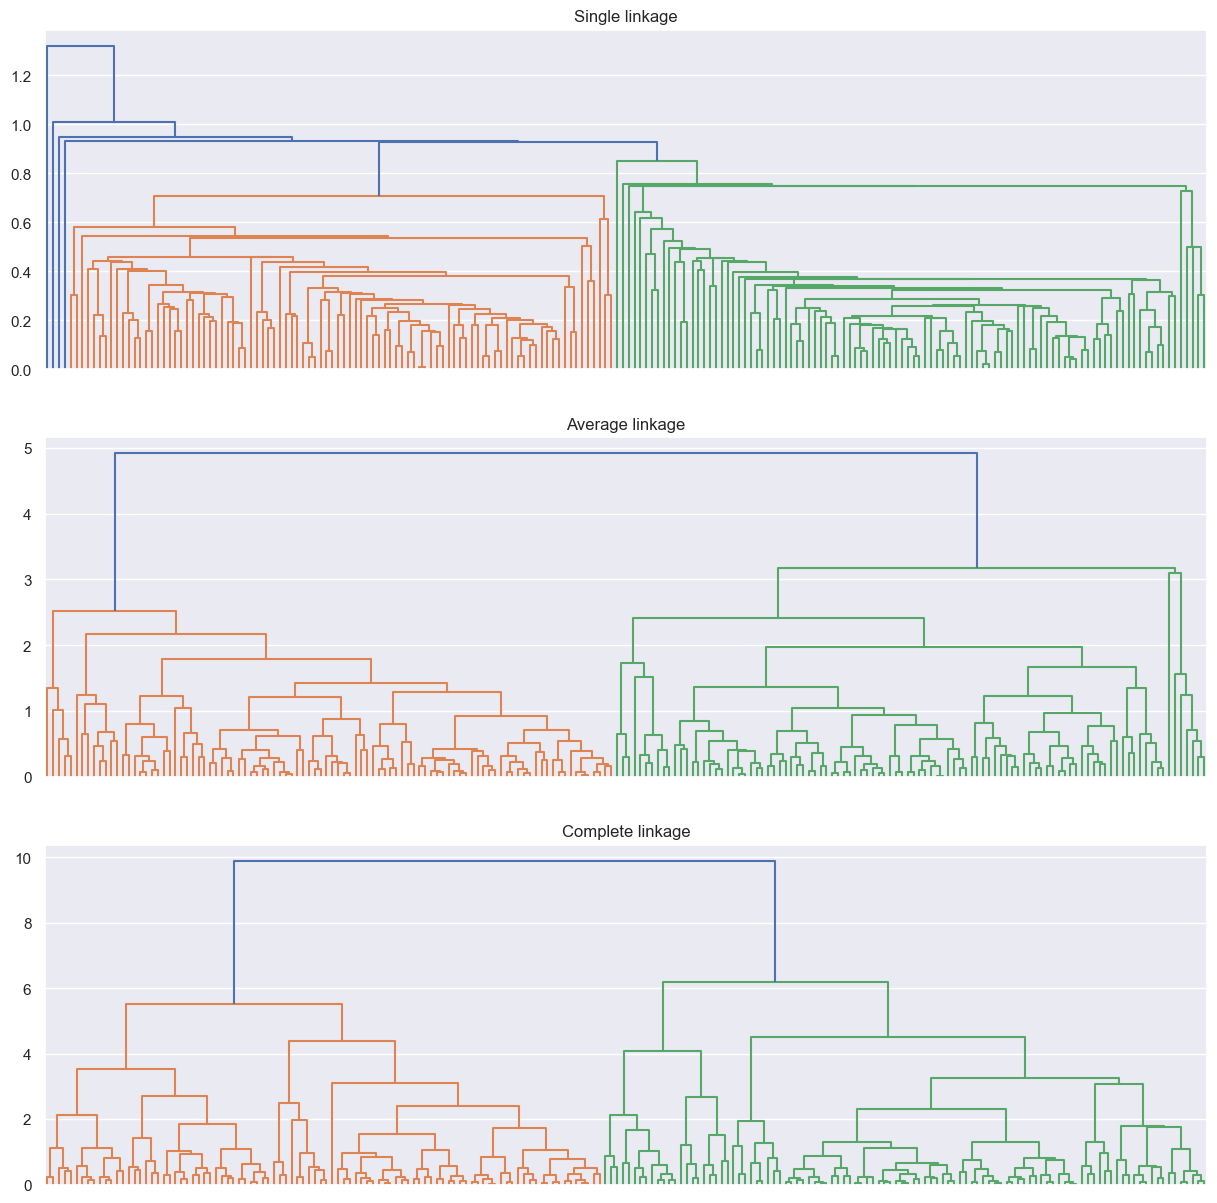

In [36]:
#al dendogram passi il risultato dei linkage
fig, axs = plt.subplots(3,1, figsize=(15,15))
dendrogram(cs[0], ax=axs[0], no_labels=True)
axs[0].set_title("Single linkage")
dendrogram(cs[1], ax=axs[1], no_labels=True)
axs[1].set_title("Average linkage")
dendrogram(cs[2], ax=axs[2], no_labels=True)
axs[2].set_title("Complete linkage")
plt.show()

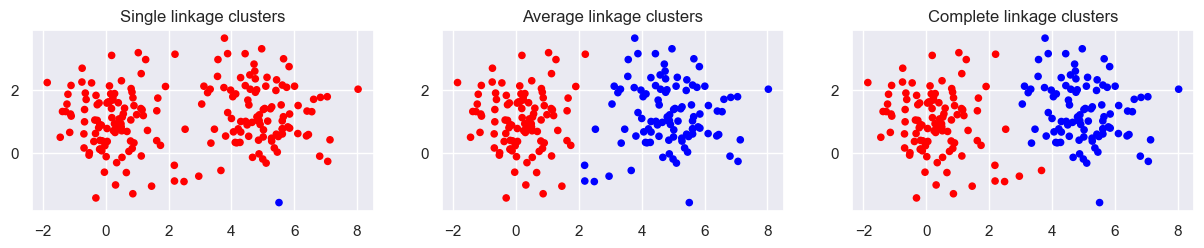

In [37]:
#cutting the dendogram into 2 classes
fig, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].scatter(X[:,0], X[:,1], c=np.where(clusters['single']==0, 'red','blue'), s=20)
axs[0].set_title("Single linkage clusters")
axs[1].scatter(X[:,0], X[:,1], c=np.where(clusters['average']==0, 'red','blue'), s=20)
axs[1].set_title("Average linkage clusters")
axs[2].scatter(X[:,0], X[:,1], c=np.where(clusters['complete']==0, 'red','blue'), s=20)
axs[2].set_title("Complete linkage clusters")
for ax in axs:
    ax.set_aspect('equal', adjustable='box')
plt.show()

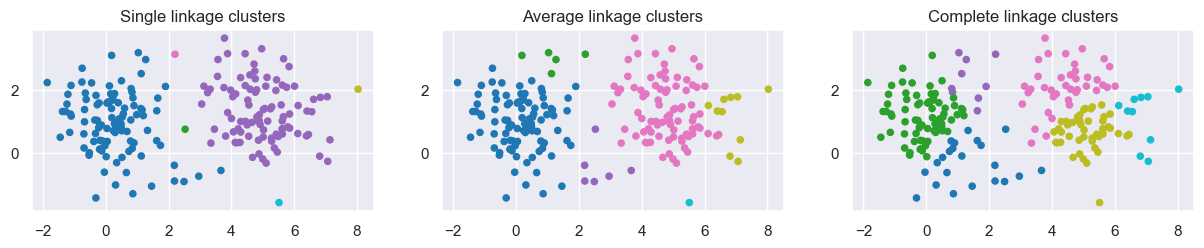

In [38]:
# Cut the dendrogram to get more clusters
k=6
cmap = plt.get_cmap('tab10')

cluster_es = cut_tree(cs[0], n_clusters=k).flatten()
cluster_ea = cut_tree(cs[1], n_clusters=k).flatten()
cluster_ec = cut_tree(cs[2], n_clusters=k).flatten()

fig, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].scatter(X[:,0], X[:,1], c=cluster_es, cmap=cmap, s=20)
axs[0].set_title("Single linkage clusters")
axs[1].scatter(X[:,0], X[:,1], c=cluster_ea, cmap=cmap, s=20)
axs[1].set_title("Average linkage clusters")
axs[2].scatter(X[:,0], X[:,1], c=cluster_ec, cmap=cmap, s=20)
axs[2].set_title("Complete linkage clusters")
for ax in axs:
    ax.set_aspect('equal', adjustable='box')
plt.show()

### Bivariate 2

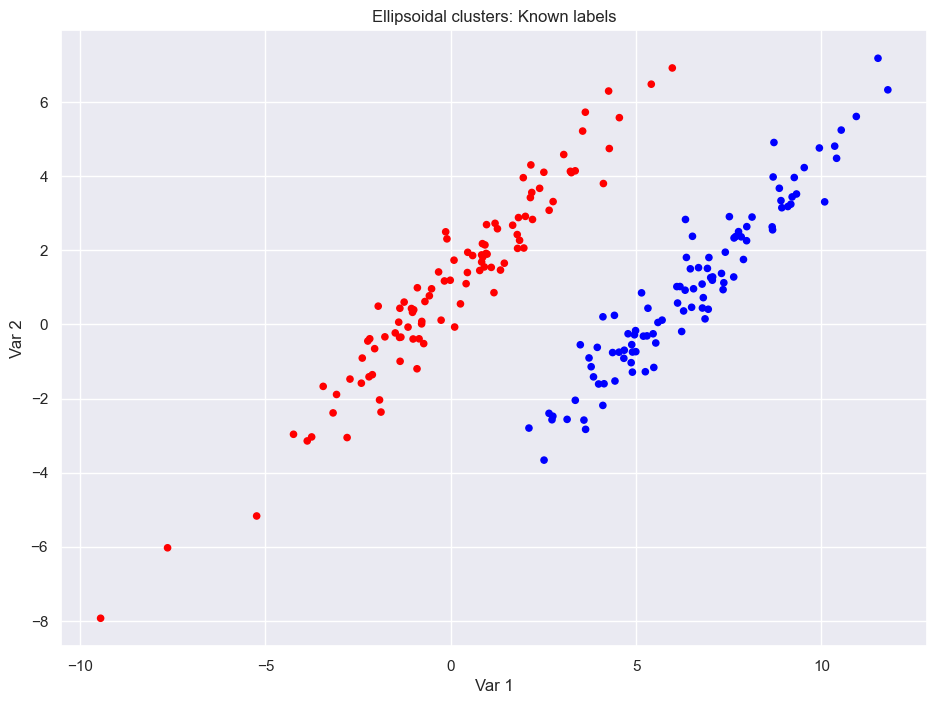

In [39]:
p = 2
n = 100
mu1 = [0, 1]
mu2 = [6.5, 1]
e1 = np.array([1, 1])
e2 = np.array([-1, 1])
sig = 5 * np.outer(e1, e1) + 0.1 * np.outer(e2, e2)
np.random.seed(2)
X1 = np.random.multivariate_normal(mu1, sig, n)
X2 = np.random.multivariate_normal(mu2, sig, n)
X = np.vstack([X1, X2])
plt.figure()
plt.scatter(X[:,0], X[:,1], c=np.repeat(['red','blue'], n), s=20)
plt.xlabel("Var 1")
plt.ylabel("Var 2")
plt.title("Ellipsoidal clusters: Known labels")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [40]:
x_d = pdist(X, metric='euclidean')
x_es = linkage(x_d, method='single')
x_ea = linkage(x_d, method='average')
x_ec = linkage(x_d, method='complete')

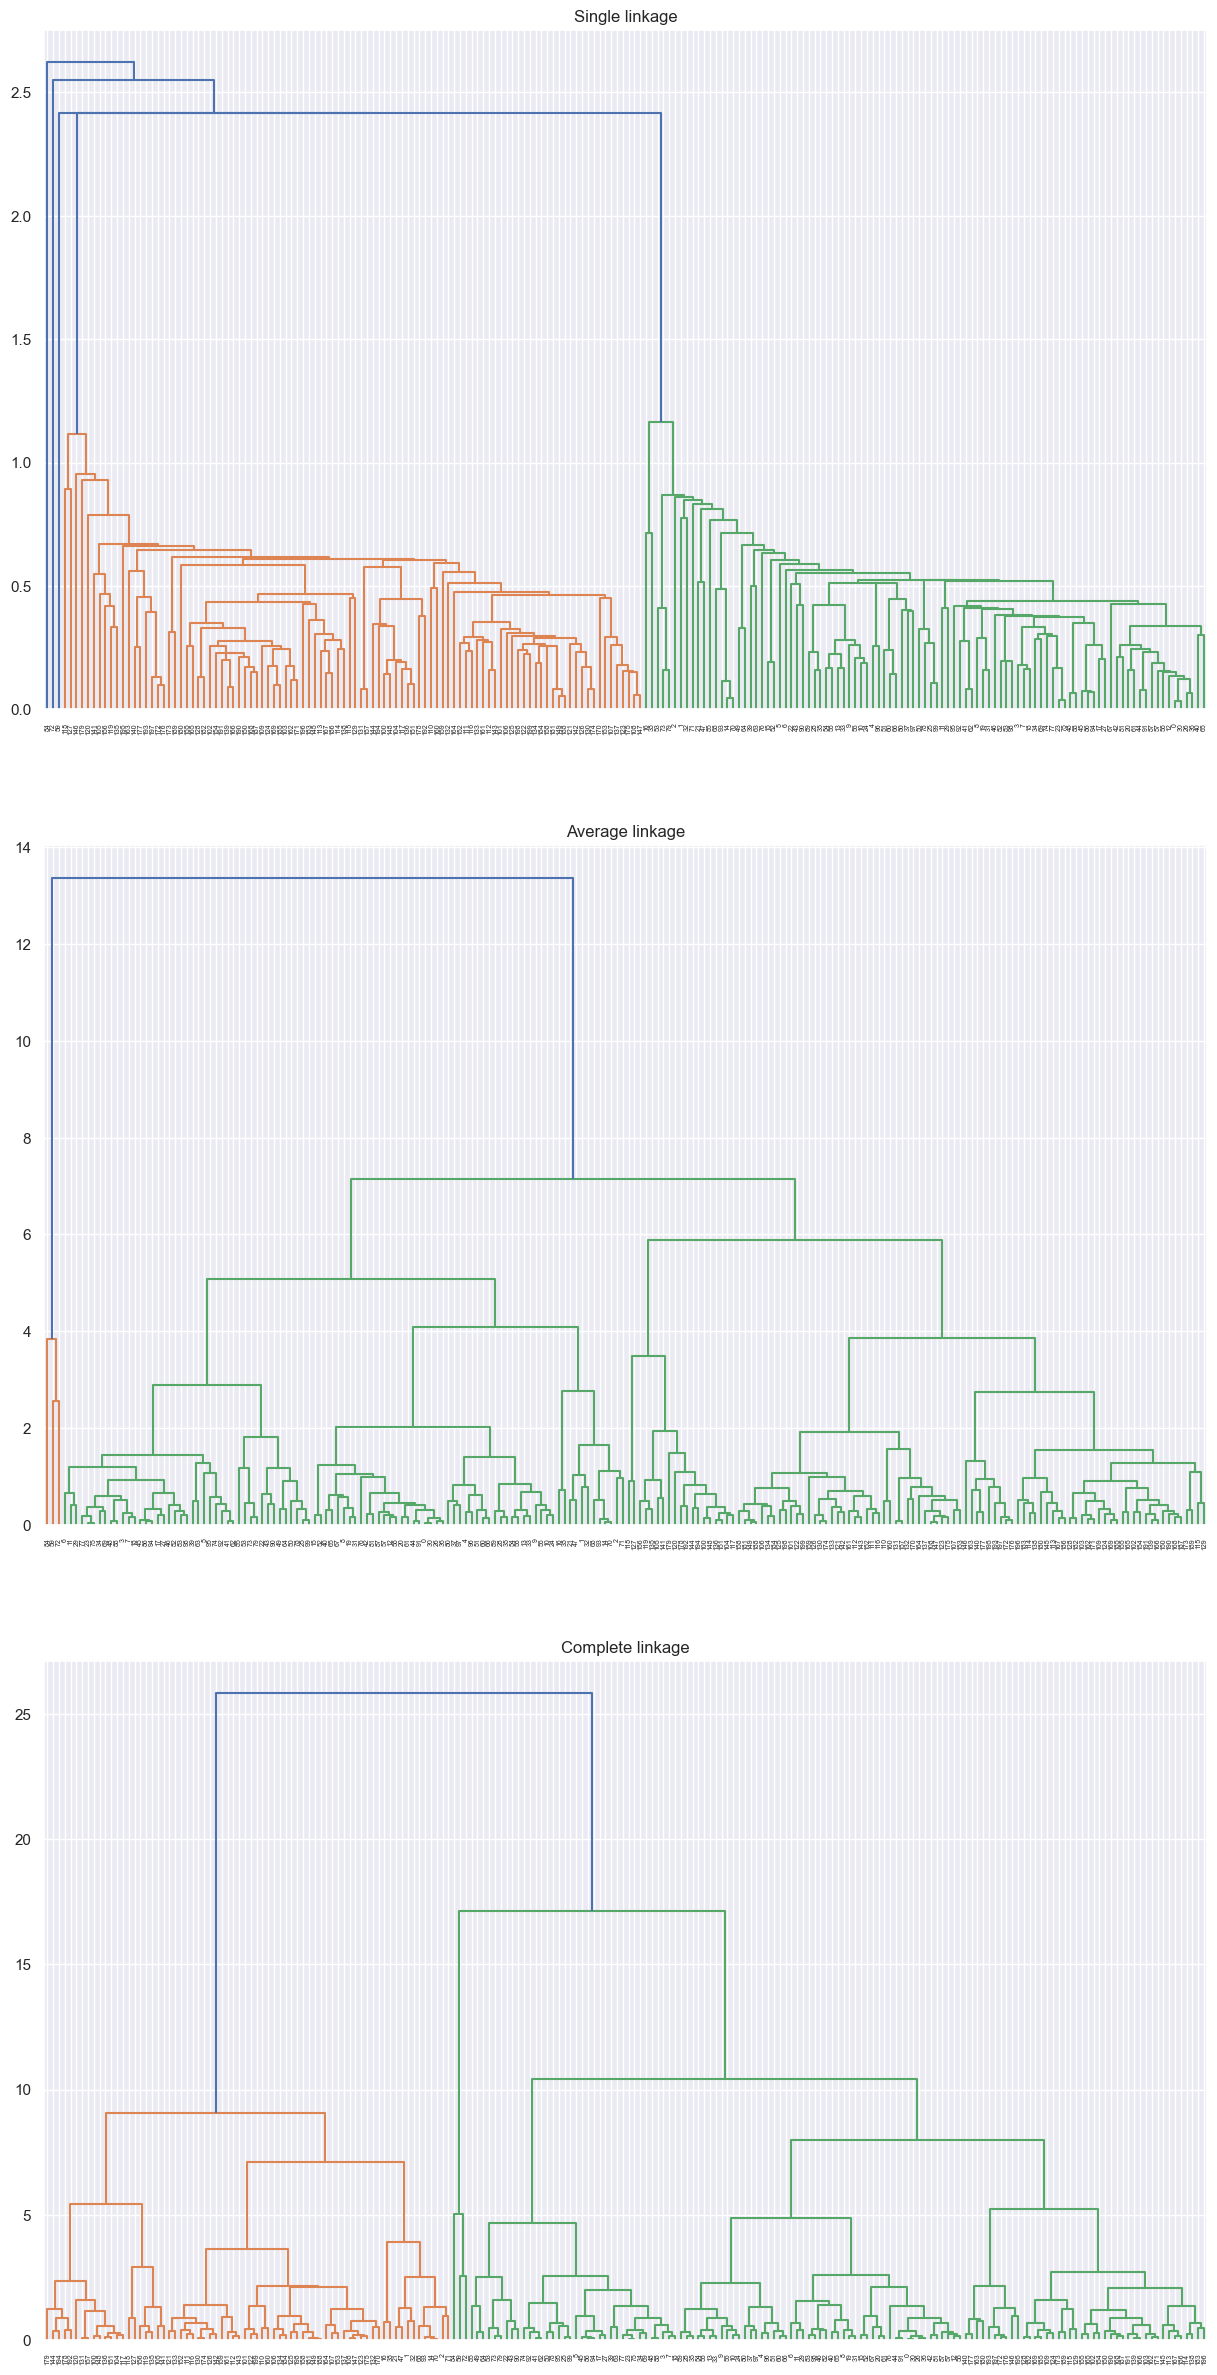

In [41]:
fig, axs = plt.subplots(3,1, figsize=(15,30))
dendrogram(x_es, ax=axs[0], no_labels=False)
axs[0].set_title("Single linkage")
dendrogram(x_ea, ax=axs[1], no_labels=False)
axs[1].set_title("Average linkage")
dendrogram(x_ec, ax=axs[2], no_labels=False)
axs[2].set_title("Complete linkage")
plt.show()

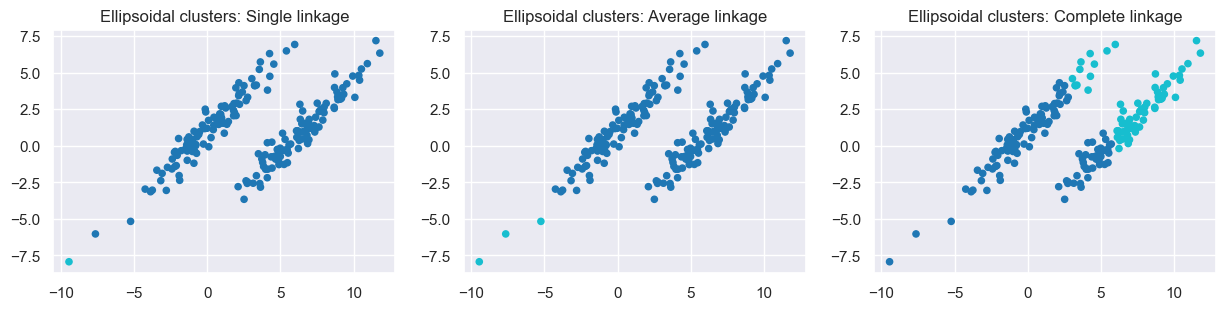

In [42]:
k=2
cluster_es = cut_tree(x_es, n_clusters=k).flatten()
cluster_ea = cut_tree(x_ea, n_clusters=k).flatten()
cluster_ec = cut_tree(x_ec, n_clusters=k).flatten()

fig, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].scatter(X[:,0], X[:,1], c=cluster_es+1, s=20, cmap='tab10')
axs[0].set_title("Ellipsoidal clusters: Single linkage")
axs[1].scatter(X[:,0], X[:,1], c=cluster_ea+1, s=20, cmap='tab10')
axs[1].set_title("Ellipsoidal clusters: Average linkage")
axs[2].scatter(X[:,0], X[:,1], c=cluster_ec+1, s=20, cmap='tab10')
axs[2].set_title("Ellipsoidal clusters: Complete linkage")
for ax in axs:
    ax.set_aspect('equal', adjustable='box')
plt.show()

What if we remove some outliers?

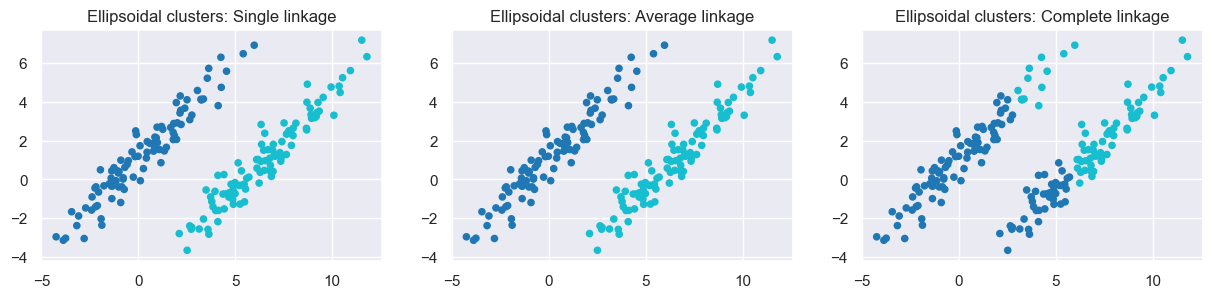

In [43]:
X_filtered = X[X[:, 1] > -5]
x_d = pdist(X_filtered, metric='euclidean')
x_es = linkage(x_d, method='single')
x_ea = linkage(x_d, method='average')
x_ec = linkage(x_d, method='complete')
k=2
cluster_es = cut_tree(x_es, n_clusters=k).flatten()
cluster_ea = cut_tree(x_ea, n_clusters=k).flatten()
cluster_ec = cut_tree(x_ec, n_clusters=k).flatten()

fig, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].scatter(X_filtered[:,0], X_filtered[:,1], c=cluster_es+1, s=20, cmap='tab10')
axs[0].set_title("Ellipsoidal clusters: Single linkage")
axs[1].scatter(X_filtered[:,0], X_filtered[:,1], c=cluster_ea+1, s=20, cmap='tab10')
axs[1].set_title("Ellipsoidal clusters: Average linkage")
axs[2].scatter(X_filtered[:,0], X_filtered[:,1], c=cluster_ec+1, s=20, cmap='tab10')
axs[2].set_title("Ellipsoidal clusters: Complete linkage")
for ax in axs:
    ax.set_aspect('equal', adjustable='box')
plt.show()

## Earthquake dataset

In [ ]:
# Load the quakes dataset from R via statsmodels
import ssl
import urllib.request
import statsmodels.api as sm
ssl._create_default_https_context = ssl._create_unverified_context
quakes = sm.datasets.get_rdataset("quakes", "datasets").data

Q = quakes.iloc[:, :2].copy()
Q['depth'] = -quakes.iloc[:, 2] / 100
print(Q)

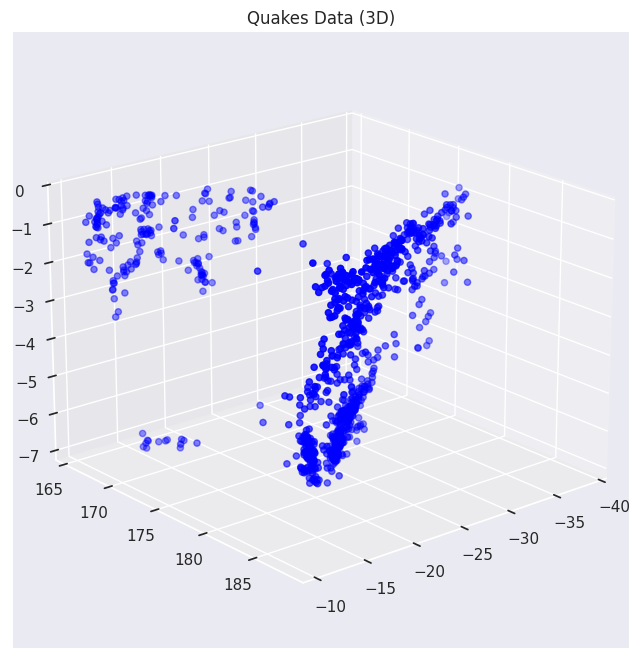

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Q.iloc[:,0], Q.iloc[:,1], Q['depth'], c='blue', s=20)
ax.set_title("Quakes Data (3D)")
ax.view_init(elev=20, azim=50)
plt.show()

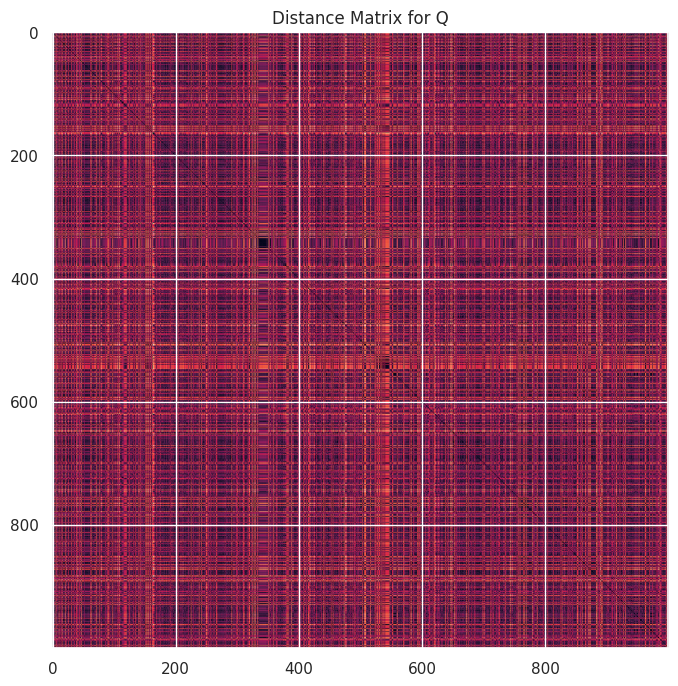

In [50]:
d_Q = pdist(Q.values, metric='euclidean')
plt.imshow(squareform(d_Q), aspect='equal')
plt.title("Distance Matrix for Q")
plt.show()

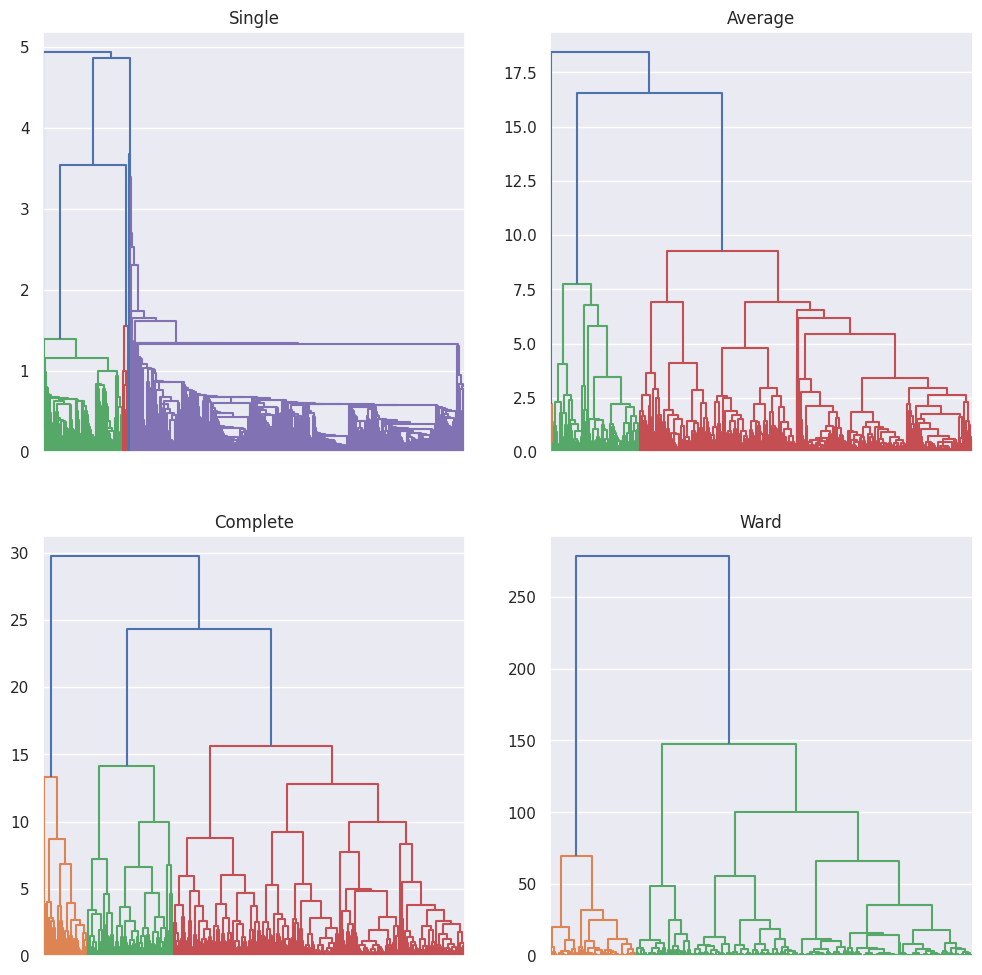

In [51]:
# Hierarchical clustering on Q:
clusts = linkage(d_Q, method='single')
clusta = linkage(d_Q, method='average')
clustc = linkage(d_Q, method='complete')
clustw = linkage(d_Q, method='ward')  # ward.D2 in R corresponds to Ward's method in scipy

fig, axs = plt.subplots(2, 2, figsize=(12,12))
dendrogram(clusts, ax=axs[0,0], no_labels=True)
axs[0,0].set_title("Single")
dendrogram(clusta, ax=axs[0,1], no_labels=True)
axs[0,1].set_title("Average")
dendrogram(clustc, ax=axs[1,0], no_labels=True)
axs[1,0].set_title("Complete")
dendrogram(clustw, ax=axs[1,1], no_labels=True)
axs[1,1].set_title("Ward")
plt.show()

Ward linkage choose the pair of clusters that once merged causes the smallest increase in WSS.

It avoids "chaining" seen in single linkage (where clusters can be stretched out).
It produces compact, spherical clusters.
It balances cluster sizes, unlike complete linkage, which might create clusters of very different sizes. It is more computational expensive.

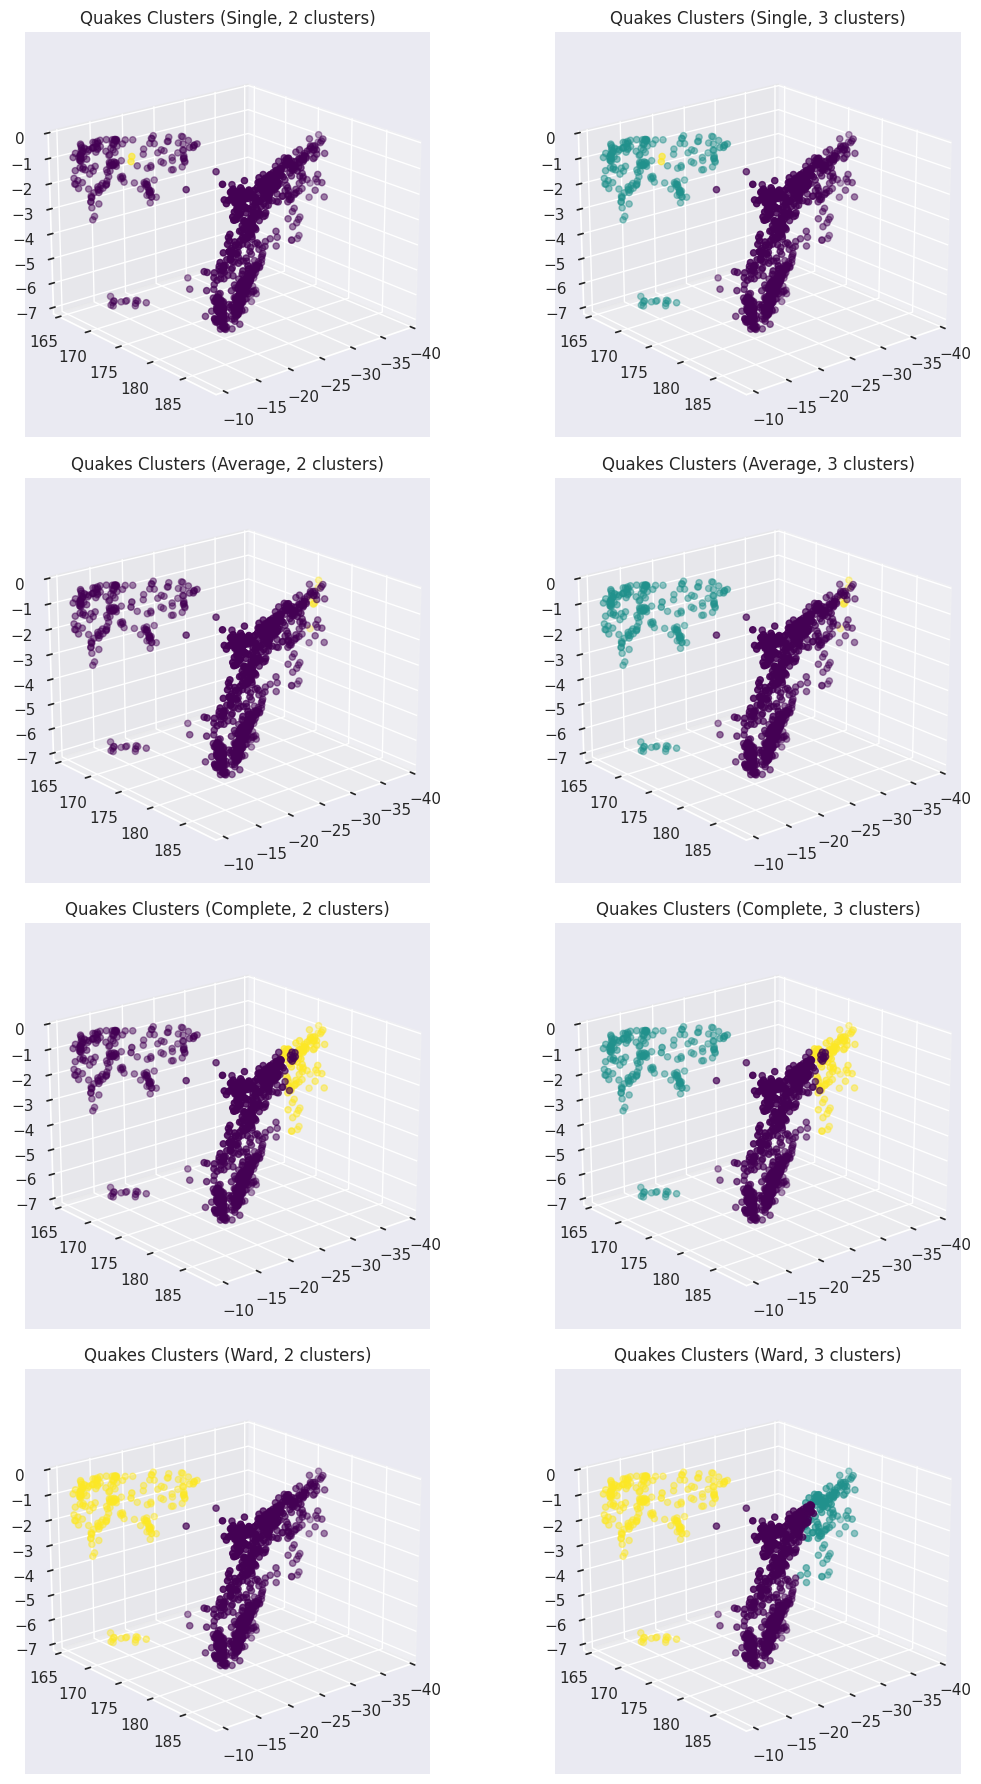

In [53]:
from scipy.cluster.hierarchy import cut_tree

cluster_s_2 = cut_tree(clusts, n_clusters=2).flatten()
cluster_s_3 = cut_tree(clusts, n_clusters=3).flatten()

cluster_a_2 = cut_tree(clusta, n_clusters=2).flatten()
cluster_a_3 = cut_tree(clusta, n_clusters=3).flatten()

cluster_c_2 = cut_tree(clustc, n_clusters=2).flatten()
cluster_c_3 = cut_tree(clustc, n_clusters=3).flatten()

cluster_w_2 = cut_tree(clustw, n_clusters=2).flatten()
cluster_w_3 = cut_tree(clustw, n_clusters=3).flatten()

# Create a 3x2 grid of 3D plots.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # ensures 3D projection support

fig = plt.figure(figsize=(12, 18))

color_map = 'viridis'

# Row 1: Single Linkage
ax1 = fig.add_subplot(4, 2, 1, projection='3d')
ax1.scatter(Q.iloc[:, 0], Q.iloc[:, 1], Q['depth'], c=cluster_s_2 + 1, s=20, cmap=color_map)
ax1.set_title("Quakes Clusters (Single, 2 clusters)")
ax1.view_init(elev=20, azim=50)

ax2 = fig.add_subplot(4, 2, 2, projection='3d')
ax2.scatter(Q.iloc[:, 0], Q.iloc[:, 1], Q['depth'], c=cluster_s_3 + 1, s=20, cmap=color_map)
ax2.set_title("Quakes Clusters (Single, 3 clusters)")
ax2.view_init(elev=20, azim=50)

# Row 2: Average Linkage
ax3 = fig.add_subplot(4, 2, 3, projection='3d')
ax3.scatter(Q.iloc[:, 0], Q.iloc[:, 1], Q['depth'], c=cluster_a_2 + 1, s=20, cmap=color_map)
ax3.set_title("Quakes Clusters (Average, 2 clusters)")
ax3.view_init(elev=20, azim=50)

ax4 = fig.add_subplot(4, 2, 4, projection='3d')
ax4.scatter(Q.iloc[:, 0], Q.iloc[:, 1], Q['depth'], c=cluster_a_3 + 1, s=20, cmap=color_map)
ax4.set_title("Quakes Clusters (Average, 3 clusters)")
ax4.view_init(elev=20, azim=50)

# Row 3: Complete Linkage
ax5 = fig.add_subplot(4, 2, 5, projection='3d')
ax5.scatter(Q.iloc[:, 0], Q.iloc[:, 1], Q['depth'], c=cluster_c_2 + 1, s=20, cmap=color_map)
ax5.set_title("Quakes Clusters (Complete, 2 clusters)")
ax5.view_init(elev=20, azim=50)

ax6 = fig.add_subplot(4, 2, 6, projection='3d')
ax6.scatter(Q.iloc[:, 0], Q.iloc[:, 1], Q['depth'], c=cluster_c_3 + 1, s=20, cmap=color_map)
ax6.set_title("Quakes Clusters (Complete, 3 clusters)")
ax6.view_init(elev=20, azim=50)

# Row 4: Ward Linkage
ax7 = fig.add_subplot(4, 2, 7, projection='3d')
ax7.scatter(Q.iloc[:, 0], Q.iloc[:, 1], Q['depth'], c=cluster_w_2 + 1, s=20, cmap=color_map)
ax7.set_title("Quakes Clusters (Ward, 2 clusters)")
ax7.view_init(elev=20, azim=50)

ax8 = fig.add_subplot(4, 2, 8, projection='3d')
ax8.scatter(Q.iloc[:, 0], Q.iloc[:, 1], Q['depth'], c=cluster_w_3 + 1, s=20, cmap=color_map)
ax8.set_title("Quakes Clusters (Ward, 3 clusters)")
ax8.view_init(elev=20, azim=50)


plt.tight_layout()
plt.show()
